In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
from plotnine import *
import patchworklib as pw

<Figure size 100x100 with 0 Axes>

In [2]:
df = pd.read_csv('brands_w_gender_region_oct20.csv')

In [3]:
df = df[df.brand.isin(["Adidas", "Converse", "New Balance", "Nike", "Reebok"])]

In [4]:
df2 = df.groupby('brand')['retweets', 'replies', 'likes', 'quote_count'].mean()
df2 = df2.reset_index()
df2

,brand,retweets,replies,likes,quote_count
0,Adidas,0.703640,0.825268,6.682227,0.167452
1,Converse,0.429787,0.669149,5.091489,0.097872
2,New Balance,0.747336,0.733638,6.849315,0.141553
3,Nike,0.634628,0.696372,7.169319,0.122470
4,Reebok,0.264463,0.549587,6.227273,0.045455


In [5]:
df2.set_index('brand').rank(ascending = False)

,retweets,replies,likes,quote_count
brand,,,,
Adidas,2.0,1.0,3.0,1.0
Converse,4.0,4.0,5.0,4.0
New Balance,1.0,2.0,2.0,2.0
Nike,3.0,3.0,1.0,3.0
Reebok,5.0,5.0,4.0,5.0


In [6]:
df2['type'] = 'unweighted'

In [7]:
df.groupby('brand')['retweets', 'replies', 'likes', 'quote_count'].std()

,retweets,replies,likes,quote_count
brand,,,,
Adidas,5.733399,10.189690,54.233350,1.792052
Converse,1.982449,2.540430,23.563164,0.717198
New Balance,3.856033,2.477455,31.930042,1.413047
Nike,6.903841,5.131612,105.950641,1.166668
Reebok,0.895063,1.559212,55.725785,0.208731


In [8]:
# Users that do return a gender
df3 = df[df['gender'].notna()]
df3 = df3.groupby('brand')['retweets', 'replies', 'likes', 'quote_count'].mean()
df3 = df3.reset_index()
df3

,brand,retweets,replies,likes,quote_count
0,Adidas,0.825321,0.754006,8.221154,0.185096
1,Converse,0.536937,0.776577,6.257658,0.135135
2,New Balance,0.899510,0.875000,7.401961,0.176471
3,Nike,0.694526,0.836675,8.970264,0.128182
4,Reebok,0.351852,0.750000,11.370370,0.046296


In [9]:
df3.set_index('brand').rank(ascending = False)

,retweets,replies,likes,quote_count
brand,,,,
Adidas,2.0,4.0,3.0,1.0
Converse,4.0,3.0,5.0,3.0
New Balance,1.0,1.0,4.0,2.0
Nike,3.0,2.0,2.0,4.0
Reebok,5.0,5.0,1.0,5.0


In [10]:
df3['type'] = 'Not Null'

In [11]:
# Users that do not return a gender
df4 = df[df['gender'].isna()]
df4 = df4.groupby('brand')['retweets', 'replies', 'likes', 'quote_count'].mean()
df4 = df4.reset_index()
df4

,brand,retweets,replies,likes,quote_count
0,Adidas,0.563937,0.907084,4.915363,0.147194
1,Converse,0.275325,0.514286,3.410390,0.044156
2,New Balance,0.497992,0.502008,5.943775,0.084337
3,Nike,0.556792,0.514052,4.829040,0.115047
4,Reebok,0.194030,0.388060,2.082090,0.044776


In [12]:
df4.set_index('brand').rank(ascending = False)

,retweets,replies,likes,quote_count
brand,,,,
Adidas,1.0,1.0,2.0,1.0
Converse,4.0,2.0,4.0,5.0
New Balance,3.0,4.0,1.0,3.0
Nike,2.0,3.0,3.0,2.0
Reebok,5.0,5.0,5.0,4.0


In [13]:
df4['type'] = 'Null'

In [14]:
df5 = pd.concat([df2, df3, df4])
df5

,brand,retweets,replies,likes,quote_count,type
0,Adidas,0.703640,0.825268,6.682227,0.167452,unweighted
1,Converse,0.429787,0.669149,5.091489,0.097872,unweighted
2,New Balance,0.747336,0.733638,6.849315,0.141553,unweighted
3,Nike,0.634628,0.696372,7.169319,0.122470,unweighted
4,Reebok,0.264463,0.549587,6.227273,0.045455,unweighted
0,Adidas,0.825321,0.754006,8.221154,0.185096,Not Null
1,Converse,0.536937,0.776577,6.257658,0.135135,Not Null
2,New Balance,0.899510,0.875000,7.401961,0.176471,Not Null
3,Nike,0.694526,0.836675,8.970264,0.128182,Not Null
4,Reebok,0.351852,0.750000,11.370370,0.046296,Not Null


In [15]:
# mean retweets
g1 = (ggplot(
    data=df5, 
    mapping=aes(x= 'brand', 
                y="retweets", fill="factor(type)")) + 
 geom_col(position="dodge", width = 0.7) + 
 labs(x = "", y = 'Retweets', title = "Mean Retweets by User Groups", fill = "Gender") + 
 scale_fill_manual(values = ["#93E9BE", "#f69697" , "#1261A0" ]) + 
 theme_bw() +
 coord_flip())

# mean replies
g2 = (ggplot(
    data=df5, 
    mapping=aes(x= 'brand', 
                y="replies", fill="factor(type)")) + 
 geom_col(position="dodge", width = 0.7) + 
 labs(x = "", y = 'Replies', title = "Mean Replies by User Groups", fill = "Gender") + 
 scale_fill_manual(values = ["#93E9BE", "#f69697" , "#1261A0" ]) + 
 theme_bw() +
 coord_flip())

# mean likes
g3 = (ggplot(
    data=df5, 
    mapping=aes(x= 'brand', 
                y="likes", fill="factor(type)")) + 
 geom_col(position="dodge", width = 0.7) + 
 labs(x = "", y = 'Likes', title = "Mean Likes by User Groups", fill = "Gender") + 
 scale_fill_manual(values = ["#93E9BE", "#f69697" , "#1261A0" ]) + 
 theme_bw() +
 coord_flip())

# mean quote
g4 = (ggplot(
    data=df5, 
    mapping=aes(x= 'brand', 
                y="quote_count", fill="factor(type)")) + 
 geom_col(position="dodge", width = 0.7) + 
 labs(x = "", y = 'Quotes', title = "Mean Quote Counts by User Groups", fill = "Gender") + 
 scale_fill_manual(values = ["#93E9BE", "#f69697" , "#1261A0" ]) + 
 theme_bw() +
 coord_flip())

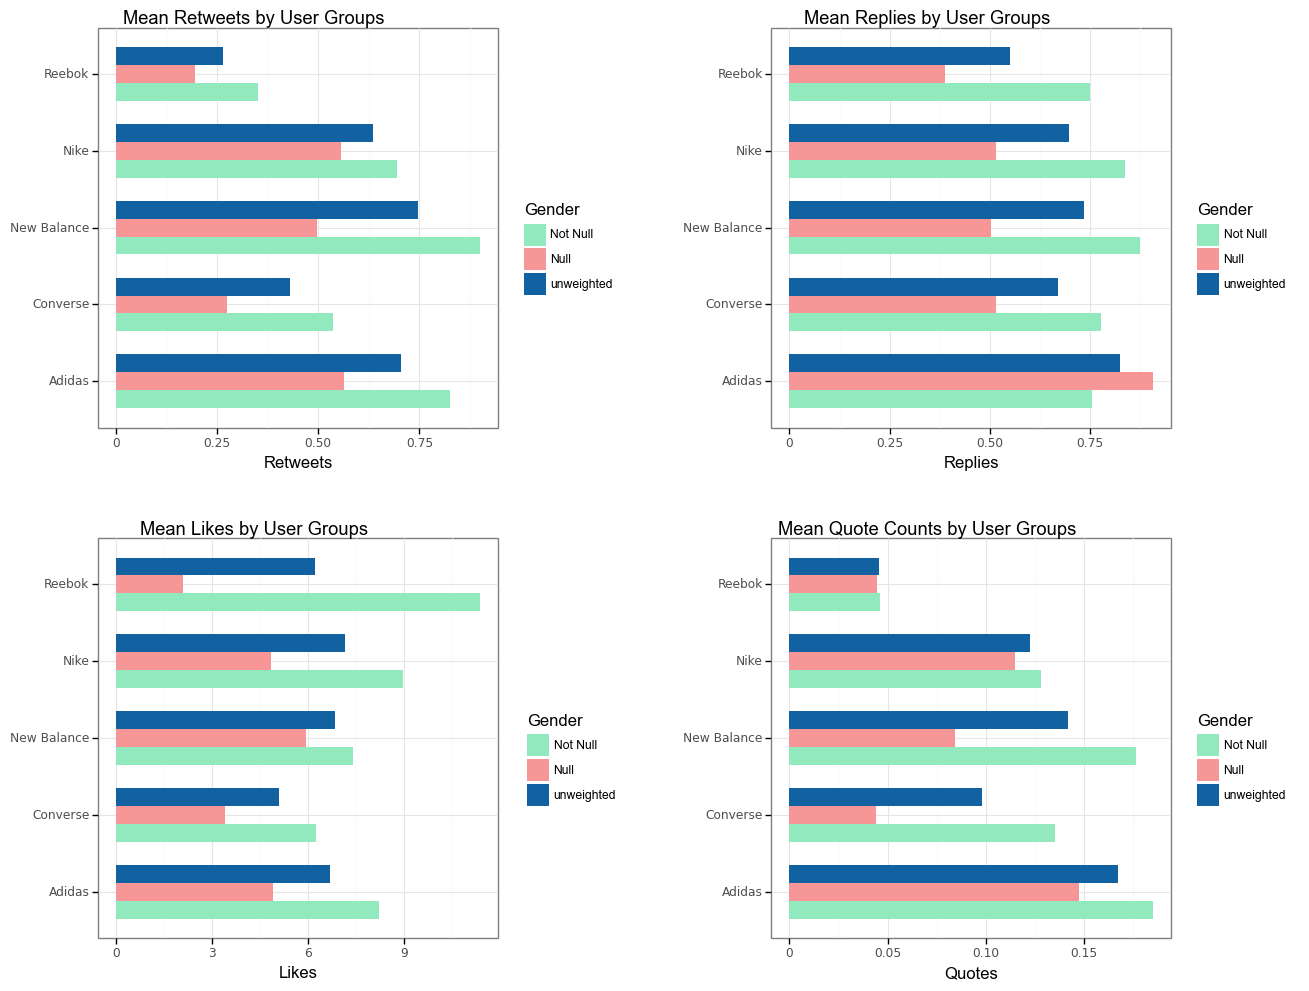

In [16]:
g1 = pw.load_ggplot(g1, figsize=(4,4))
g2 = pw.load_ggplot(g2, figsize=(4,4))
g3 = pw.load_ggplot(g3, figsize=(4,4))
g4 = pw.load_ggplot(g4, figsize=(4,4))

g1234 = (g1|g2)/(g3|g4)
g1234.savefig()

In [17]:
# Users that do return a region
df3 = df[df['region'].notna()]
df3 = df3.groupby('brand')['retweets', 'replies', 'likes', 'quote_count'].mean()
df3 = df3.reset_index()
df3
df3['type'] = 'Not Null'
# Users that do not return a gender
df4 = df[df['region'].isna()]
df4 = df4.groupby('brand')['retweets', 'replies', 'likes', 'quote_count'].mean()
df4 = df4.reset_index()
df4
df4['type'] = 'Null'
df5 = pd.concat([df2, df3, df4])

,brand,retweets,replies,likes,quote_count,type
0,Adidas,0.703640,0.825268,6.682227,0.167452,unweighted
1,Converse,0.429787,0.669149,5.091489,0.097872,unweighted
2,New Balance,0.747336,0.733638,6.849315,0.141553,unweighted
3,Nike,0.634628,0.696372,7.169319,0.122470,unweighted
4,Reebok,0.264463,0.549587,6.227273,0.045455,unweighted
0,Adidas,0.935227,0.857955,9.352273,0.196591,Not Null
1,Converse,0.551813,0.668394,5.823834,0.088083,Not Null
2,New Balance,0.738971,0.856618,7.091912,0.088235,Not Null
3,Nike,0.664959,0.851160,9.081350,0.092799,Not Null
4,Reebok,0.364865,0.864865,14.689189,0.040541,Not Null


In [18]:
# mean retweets
g1 = (ggplot(
    data=df5, 
    mapping=aes(x= 'brand', 
                y="retweets", fill="factor(type)")) + 
 geom_col(position="dodge", width = 0.7) + 
 labs(x = "", y = 'Retweets', title = "Mean Retweets by User Groups", fill = "Region") + 
 scale_fill_manual(values = ["#93E9BE", "#f69697" , "#1261A0" ]) + 
 theme_bw() +
 coord_flip())

# mean replies
g2 = (ggplot(
    data=df5, 
    mapping=aes(x= 'brand', 
                y="replies", fill="factor(type)")) + 
 geom_col(position="dodge", width = 0.7) + 
 labs(x = "", y = 'Replies', title = "Mean Replies by User Groups", fill = "Region") + 
 scale_fill_manual(values = ["#93E9BE", "#f69697" , "#1261A0" ]) + 
 theme_bw() +
 coord_flip())

# mean likes
g3 = (ggplot(
    data=df5, 
    mapping=aes(x= 'brand', 
                y="likes", fill="factor(type)")) + 
 geom_col(position="dodge", width = 0.7) + 
 labs(x = "", y = 'Likes', title = "Mean Likes by User Groups", fill = "Region") + 
 scale_fill_manual(values = ["#93E9BE", "#f69697" , "#1261A0" ]) + 
 theme_bw() +
 coord_flip())

# mean quote
g4 = (ggplot(
    data=df5, 
    mapping=aes(x= 'brand', 
                y="quote_count", fill="factor(type)")) + 
 geom_col(position="dodge", width = 0.7) + 
 labs(x = "", y = 'Quotes', title = "Mean Quote Counts by User Groups", fill = "Region") + 
 scale_fill_manual(values = ["#93E9BE", "#f69697" , "#1261A0" ]) + 
 theme_bw() +
 coord_flip())

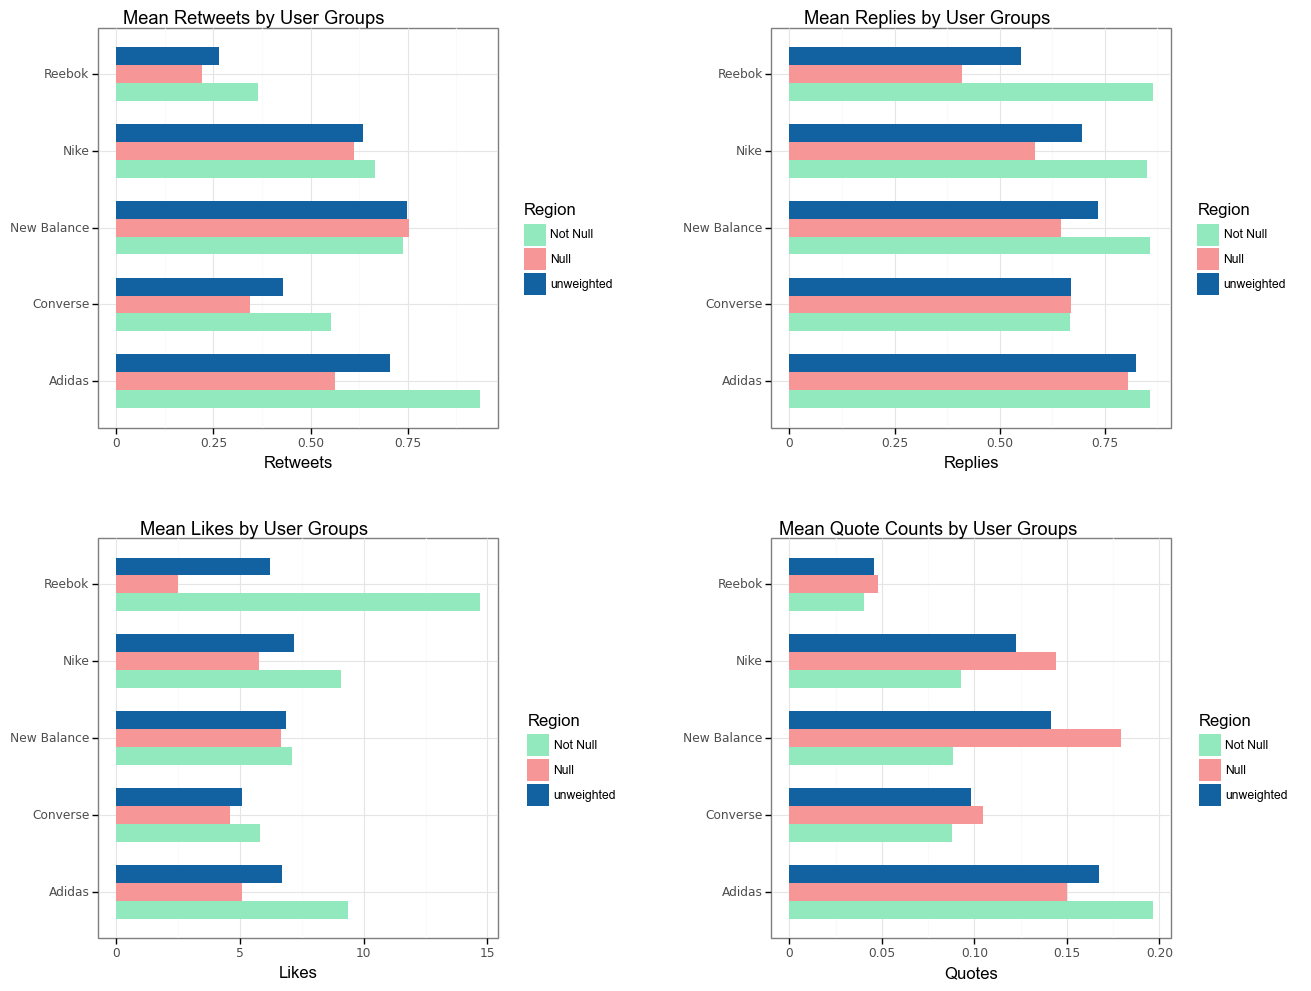

In [19]:
g1 = pw.load_ggplot(g1, figsize=(4,4))
g2 = pw.load_ggplot(g2, figsize=(4,4))
g3 = pw.load_ggplot(g3, figsize=(4,4))
g4 = pw.load_ggplot(g4, figsize=(4,4))

g1234 = (g1|g2)/(g3|g4)
g1234.savefig()

In [27]:
# Users that do return a region and gender
df3 = df[df[['gender','region']].notna().all(1)]
df3 = df3.groupby('brand')['retweets', 'replies', 'likes', 'quote_count'].mean()
df3 = df3.reset_index()
df3
df3['type'] = 'Both Not Null'
# Users that do not return either gender nor region
df4 = df[df[['gender','region']].isna().all(1)]
df4 = df4.groupby('brand')['retweets', 'replies', 'likes', 'quote_count'].mean()
df4 = df4.reset_index()
df4
df4['type'] = 'Both Null'
df5 = pd.concat([df2, df3, df4])

In [28]:
# mean retweets
g1 = (ggplot(
    data=df5, 
    mapping=aes(x= 'brand', 
                y="retweets", fill="factor(type)")) + 
 geom_col(position="dodge", width = 0.7) + 
 labs(x = "", y = 'Retweets', title = "Mean Retweets by User Groups", fill = "Gender and Region") + 
 scale_fill_manual(values = ["#93E9BE", "#f69697" , "#1261A0" ]) + 
 theme_bw() +
 coord_flip())

# mean replies
g2 = (ggplot(
    data=df5, 
    mapping=aes(x= 'brand', 
                y="replies", fill="factor(type)")) + 
 geom_col(position="dodge", width = 0.7) + 
 labs(x = "", y = 'Replies', title = "Mean Replies by User Groups", fill = "Gender and Region") + 
 scale_fill_manual(values = ["#93E9BE", "#f69697" , "#1261A0" ]) + 
 theme_bw() +
 coord_flip())

# mean likes
g3 = (ggplot(
    data=df5, 
    mapping=aes(x= 'brand', 
                y="likes", fill="factor(type)")) + 
 geom_col(position="dodge", width = 0.7) + 
 labs(x = "", y = 'Likes', title = "Mean Likes by User Groups", fill = "Gender and Region") + 
 scale_fill_manual(values = ["#93E9BE", "#f69697" , "#1261A0" ]) + 
 theme_bw() +
 coord_flip())

# mean quote
g4 = (ggplot(
    data=df5, 
    mapping=aes(x= 'brand', 
                y="quote_count", fill="factor(type)")) + 
 geom_col(position="dodge", width = 0.7) + 
 labs(x = "", y = 'Quotes', title = "Mean Quote Counts by User Groups", fill = "Gender and Region") + 
 scale_fill_manual(values = ["#93E9BE", "#f69697" , "#1261A0" ]) + 
 theme_bw() +
 coord_flip())

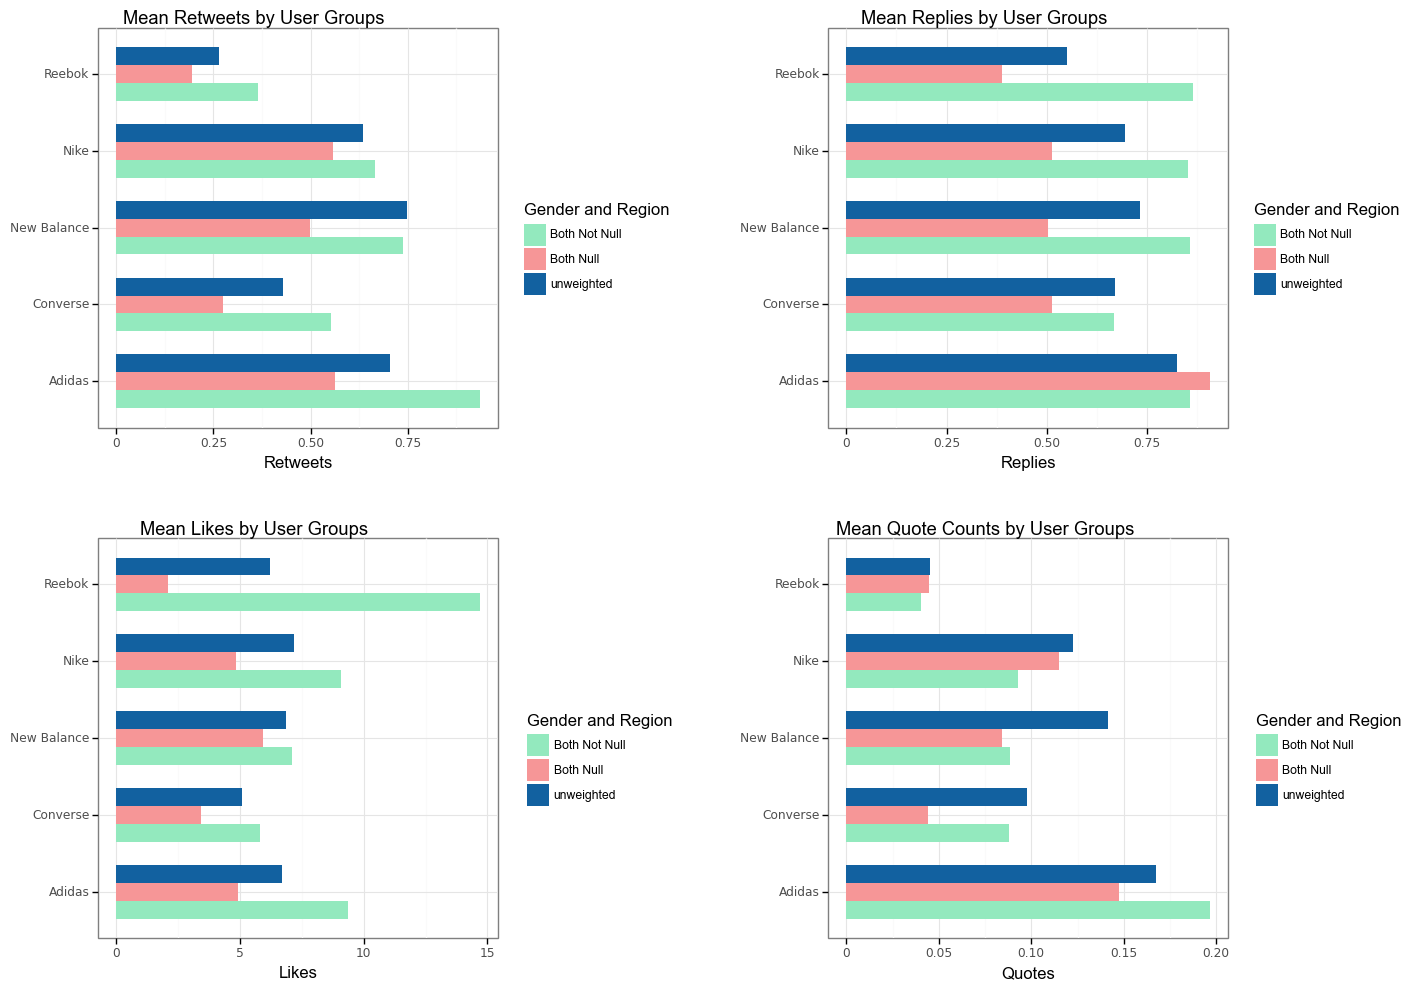

In [29]:
g1 = pw.load_ggplot(g1, figsize=(4,4))
g2 = pw.load_ggplot(g2, figsize=(4,4))
g3 = pw.load_ggplot(g3, figsize=(4,4))
g4 = pw.load_ggplot(g4, figsize=(4,4))

g1234 = (g1|g2)/(g3|g4)
g1234.savefig()